In [8]:
# Set up notebook
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/scratch/psalas/LASSI/lassi-analysis_v2/psalas_lassi_env/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
import numpy as np
import pylab as plt

from astropy.io import fits

import sys
sys.path.append('/home/scratch/psalas/LASSI/lassi-analysis_v2')

# Load lassi-analysis modules
from grid import regridXYZ
from utils.utils import midPoint
from plotting import plotZernikes
from simulateSignal import zernikePoly

In [10]:
from plotting import barChartPlot

In [11]:
path = "/home/gbtdata/TLASSI_200219/"
filename = "{0}/LASSI/{1}".format(path, "2020_02_19_16:21:16.zernike.fits")

In [12]:
hdu = fits.open(filename)
surf = hdu[1].data
zern = hdu[2].data

In [13]:
zern_vals = zern['value']

In [14]:
theta = np.linspace(0, 2*np.pi, 400)
rho = np.linspace(0, 1, 400)
[u,r] = np.meshgrid(theta,rho)
X = r*np.cos(u)
Y = r*np.sin(u)

In [15]:
z = zernikePoly(X, Y, 0, 0, 
                zern_vals, xMax=-1e22, yMax=-1e22, verbose=False)

In [16]:
z_ = zernikePoly(surf['x'], surf['y'], midPoint(surf['x']), midPoint(surf['y']), 
                zern_vals, xMax=-1e22, yMax=-1e22, verbose=False)
xx, yy, zz = regridXYZ(surf['x'], surf['y'], z_, n=512)
mask = (((xx - midPoint(xx))**2. + (yy - midPoint(yy))**2.) < 49.**2.)
zz[~mask] = np.nan

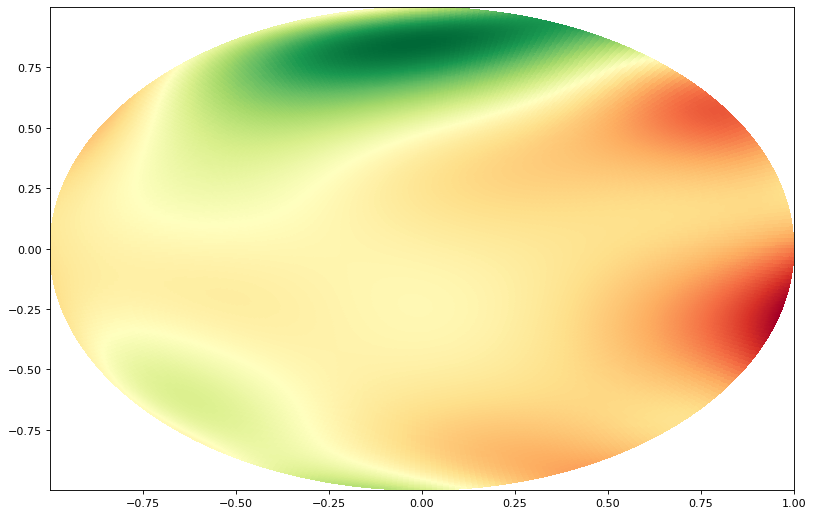

In [17]:
fig = plt.figure(figsize=(12, 8), dpi=80)
ax = fig.gca()
im = plt.pcolormesh(X, Y, z, cmap=cm.RdYlGn)
#plt.imshow(z)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

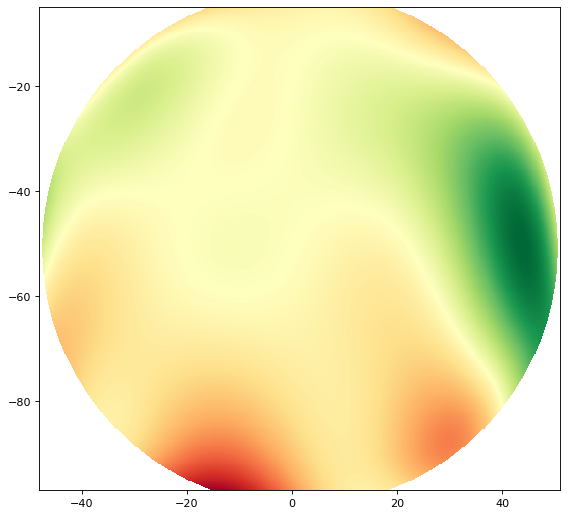

In [19]:
fig = plt.figure(figsize=(12, 8), dpi=80)
ax = fig.gca()
#im = plt.pcolormesh(X, Y, z, cmap=cm.RdYlGn)
ax.imshow(zz.T, cmap=cm.RdYlGn, extent=[np.nanmin(xx), np.nanmax(xx), np.nanmin(yy), np.nanmax(yy)])
plt.colorbar()


In [20]:
np.nanmax(yy)

-5.0623279573437685

In [21]:
from plotting import plotZernikes

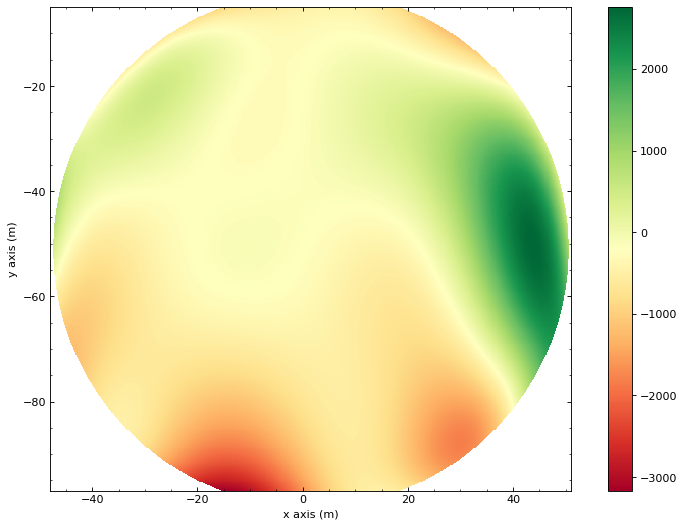

In [22]:
plotZernikes(surf['x'], surf['y'], zern_vals, n=512, title=None, filename=None)